# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)

577

In [8]:
weather_df = pd.DataFrame({"City":cities, "Cloudiness":'', "Country":countries, "Date":'', "Humidity":'',
                           "Lat":'', "Lng":'', "Max Temp":'', "Wind Speed":''})
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dakar,,SN,,,,,,
1,hithadhoo,,MV,,,,,,
2,port alfred,,ZA,,,,,,
3,tamuin,,MX,,,,,,
4,illoqqortoormiut,,GL,,,,,,
5,carnarvon,,AU,,,,,,
6,shimoda,,JP,,,,,,
7,leningradskiy,,RU,,,,,,
8,nogent-le-rotrou,,FR,,,,,,
9,albany,,AU,,,,,,


In [9]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
count = 1
count_set = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
 print("Begining Data Retrieval \n-----------------------")
    
for index, row in weather_df.iterrows():
    
    query_url = url + row["City"] + ',' + row["Country"] + "&appid=" + weather_api_key 
    
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        print(f'Processing Record {count} of Set {count_set} | {response_json["name"]}')
        
        weather_df.loc[index, "Cloudiness"] = response_json["clouds"]["all"]
        weather_df.loc[index, "Date"] = response_json["dt"]
        weather_df.loc[index, "Humidity"] = response_json["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response_json["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response_json["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response_json["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response_json["wind"]["speed"]
        
        count += 1
              
    except (KeyError,):
          print("City not found. Skipping....")
              
    if count == 51:
        count = 1
        count_set += 1
        time.sleep(60)
    
print("------------------------\n Data Retrieval Complete \n--------------------------")


Begining Data Retrieval 
-----------------------
Processing Record 1 of Set 1 | Dakar
Processing Record 2 of Set 1 | Hithadhoo
Processing Record 3 of Set 1 | Port Alfred
Processing Record 4 of Set 1 | Tamuin
City not found. Skipping....
Processing Record 5 of Set 1 | Carnarvon
Processing Record 6 of Set 1 | Shimoda
Processing Record 7 of Set 1 | Leningradskiy
Processing Record 8 of Set 1 | Arrondissement de Nogent-le-Rotrou
Processing Record 9 of Set 1 | Albany
Processing Record 10 of Set 1 | Mount Isa
Processing Record 11 of Set 1 | Arraial do Cabo
Processing Record 12 of Set 1 | Georgetown
Processing Record 13 of Set 1 | Pisco
Processing Record 14 of Set 1 | Tshikapa
Processing Record 15 of Set 1 | Cambrils
City not found. Skipping....
Processing Record 16 of Set 1 | Ushuaia
Processing Record 17 of Set 1 | Butaritari
Processing Record 18 of Set 1 | Olafsvik
Processing Record 19 of Set 1 | Atuona
Processing Record 20 of Set 1 | Fortuna
Processing Record 21 of Set 1 | Kaitangata
Proces

Processing Record 34 of Set 4 | Puerto Quijarro
Processing Record 35 of Set 4 | Mogadishu
Processing Record 36 of Set 4 | Rio Grande
Processing Record 37 of Set 4 | Comodoro Rivadavia
Processing Record 38 of Set 4 | Cayenne
City not found. Skipping....
Processing Record 39 of Set 4 | Ola
Processing Record 40 of Set 4 | Beringovskiy
Processing Record 41 of Set 4 | Seymchan
Processing Record 42 of Set 4 | Lebu
Processing Record 43 of Set 4 | Salalah
Processing Record 44 of Set 4 | Ilebo
Processing Record 45 of Set 4 | Ilulissat
Processing Record 46 of Set 4 | Bluff
Processing Record 47 of Set 4 | Obo
Processing Record 48 of Set 4 | Lima
Processing Record 49 of Set 4 | Rocha
Processing Record 50 of Set 4 | Broome
Processing Record 1 of Set 5 | Sitka
Processing Record 2 of Set 5 | Constitucion
Processing Record 3 of Set 5 | Bahua
Processing Record 4 of Set 5 | Fort Nelson
Processing Record 5 of Set 5 | Blagodarnyy
Processing Record 6 of Set 5 | Cidreira
Processing Record 7 of Set 5 | Saint

Processing Record 16 of Set 8 | Clarence Town
Processing Record 17 of Set 8 | Chulym
Processing Record 18 of Set 8 | Pinotepa Nacional
Processing Record 19 of Set 8 | Linxia
Processing Record 20 of Set 8 | Sinnamary
Processing Record 21 of Set 8 | Kavaratti
Processing Record 22 of Set 8 | Havre-Saint-Pierre
Processing Record 23 of Set 8 | Quelimane
Processing Record 24 of Set 8 | Moerai
Processing Record 25 of Set 8 | Malavalli
Processing Record 26 of Set 8 | Honiara
Processing Record 27 of Set 8 | Paamiut
Processing Record 28 of Set 8 | Alvorada
Processing Record 29 of Set 8 | Saint-Pierre
Processing Record 30 of Set 8 | Meulaboh
Processing Record 31 of Set 8 | Tobol
Processing Record 32 of Set 8 | Vanimo
City not found. Skipping....
Processing Record 33 of Set 8 | Dillon
Processing Record 34 of Set 8 | Oranjemund
Processing Record 35 of Set 8 | Rajshahi
Processing Record 36 of Set 8 | Banyuwangi
Processing Record 37 of Set 8 | Mantua
Processing Record 38 of Set 8 | Oriximina
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# output to csv
weather_df["Max Temp"] = weather_df["Max Temp"].replace('',np.nan)
weather_df.dropna(axis=0, how="any", inplace=True)

weather_df.to_csv("output_data/weather_data.csv")

In [12]:
weather_df.count()

City          517
Cloudiness    517
Country       517
Date          517
Humidity      517
Lat           517
Lng           517
Max Temp      517
Wind Speed    517
dtype: int64

In [13]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dakar,0,SN,1580508714,31,14.69,-17.44,78.80,14.99
1,hithadhoo,59,MV,1580508841,72,-0.6,73.08,81.63,10.92
2,port alfred,95,ZA,1580508841,90,-33.59,26.89,72.00,7
3,tamuin,92,MX,1580508841,67,21.98,-98.75,70.93,3.4
5,carnarvon,0,AU,1580508841,72,-24.87,113.63,66.20,13.87


In [17]:
research_date = datetime.datetime.now()
print(research_date.strftime("%x"))

01/31/20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

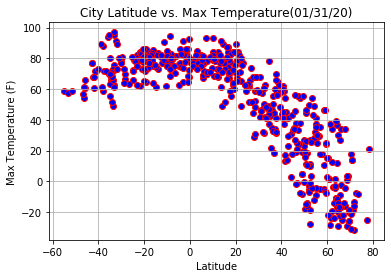

In [50]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Max Temperature" + '(' + f"{research_date.strftime('%x')}" + ')')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs temp plot.png")
plt.show()

## Lat Vs Temp

The plot above is trying to establish a relationship between a city's latitude and the temperature of the area.

#### Latitude vs. Humidity Plot

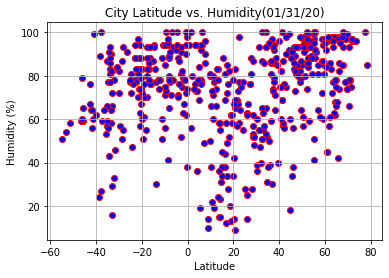

In [49]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o',facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Humidity"+ '(' + f"{research_date.strftime('%x')}" + ')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs humidity plot.png")
plt.show()

## Lat vs Humidity
This plot tries to establish a relationship between latitude and humidity of a city.

#### Latitude vs. Cloudiness Plot

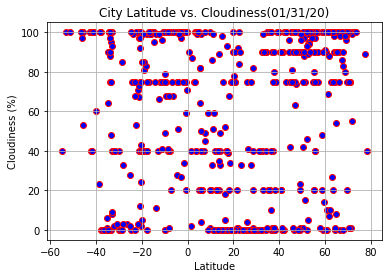

In [48]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Cloudiness"+ '(' + f"{research_date.strftime('%x')}" + ')')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs cloudiness plot.png")
plt.show()

## Latitude vs cloudiness
Trying to establish a relationship between Latitude and cloudiness of a city.

#### Latitude vs. Wind Speed Plot

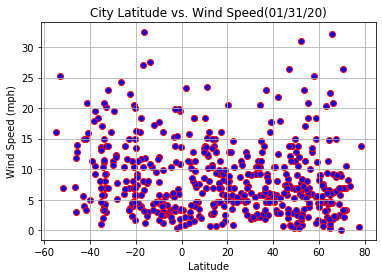

In [47]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Wind Speed"+ '(' + f"{research_date.strftime('%x')}" + ')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs wind speed plot.png")
plt.show()

## Lat vs Wind speed
How is wind speed affected by latitude of a city?

## Linear Regression

In [41]:
# Create Northern and Southern Hemisphere DataFrames
weather_df['Hemisphere'] = np.where(weather_df['Lat'] >= 0,'Nothern Hemisphere', 'Southern Hemisphere')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,dakar,0,SN,1580508714,31,14.69,-17.44,78.80,14.99,Nothern Hemisphere
1,hithadhoo,59,MV,1580508841,72,-0.6,73.08,81.63,10.92,Southern Hemisphere
2,port alfred,95,ZA,1580508841,90,-33.59,26.89,72.00,7,Southern Hemisphere
3,tamuin,92,MX,1580508841,67,21.98,-98.75,70.93,3.4,Nothern Hemisphere
5,carnarvon,0,AU,1580508841,72,-24.87,113.63,66.20,13.87,Southern Hemisphere


In [42]:
nothern_df = weather_df.loc[weather_df['Hemisphere'] == 'Nothern Hemisphere']
nothern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,dakar,0,SN,1580508714,31,14.69,-17.44,78.80,14.99,Nothern Hemisphere
3,tamuin,92,MX,1580508841,67,21.98,-98.75,70.93,3.4,Nothern Hemisphere
6,shimoda,100,JP,1580508841,52,34.67,138.95,37.00,14.63,Nothern Hemisphere
7,leningradskiy,96,RU,1580508842,97,69.38,178.42,-20.20,5.77,Nothern Hemisphere
8,nogent-le-rotrou,100,FR,1580508842,93,48.33,1,54.00,13.87,Nothern Hemisphere


In [43]:
southern_df = weather_df.loc[weather_df['Hemisphere'] == 'Southern Hemisphere']
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
1,hithadhoo,59,MV,1580508841,72,-0.6,73.08,81.63,10.92,Southern Hemisphere
2,port alfred,95,ZA,1580508841,90,-33.59,26.89,72.00,7,Southern Hemisphere
5,carnarvon,0,AU,1580508841,72,-24.87,113.63,66.20,13.87,Southern Hemisphere
9,albany,90,AU,1580508793,87,-35.02,117.89,55.40,6.93,Southern Hemisphere
10,mount isa,75,AU,1580508842,94,-20.73,139.5,78.80,10.29,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8736684700099794


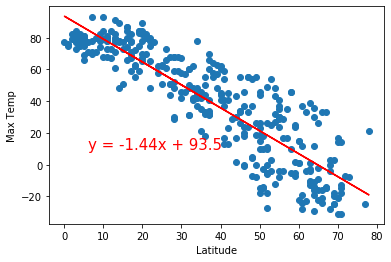

In [44]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Max Temp vs Lat.png')
plt.show()

## Nothern Hem Max Temp Vs Lat
No relationship can be established between temperature and latitude of the cities in the nothern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39469037063743173


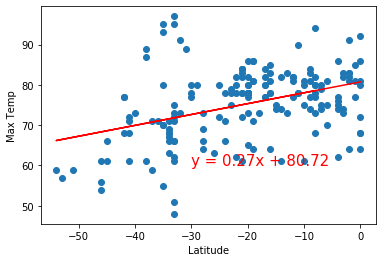

In [51]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Max Temp vs Lat.png')
plt.show()

## Sothern Hem Temp vs Lat
There is a very weak relationship established between the max temp and latitude in the southern hemisphere.
However we cannot fully rely on this data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41378567387185655


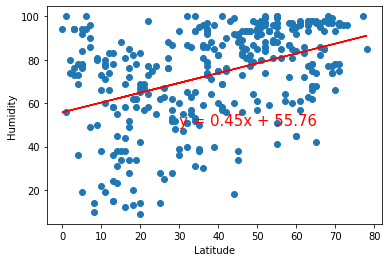

In [52]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Humidity(%) vs Lat.png')
plt.show()

## Nothern Hemisphere Humidity vs Lat
The relationship established between the nothern hemisphere's humidity vs latitude is too weak to be relied on.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3261368290068217


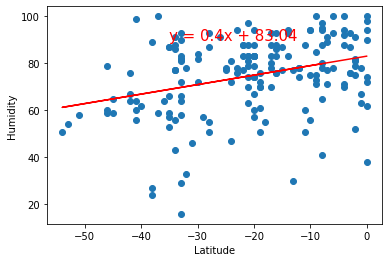

In [53]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Humidity(%) vs Lat.png')
plt.show()

## Southern Hemisphere Humidity vs Lat
No relationship can be established.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30206126771876096


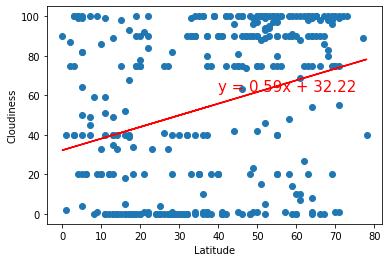

In [54]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,62),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Cloudiness(%) vs Lat.png')
plt.show()

## Nothern hemisphere cloudiness vs lat
A weak relationship can be established between cloudiness in the nothern hemisphere and the latitude although this is not totally reliable.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16508927397149126


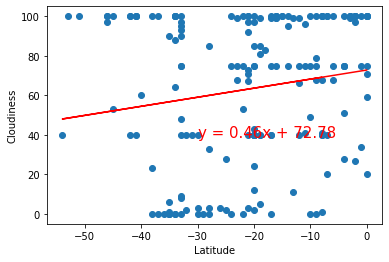

In [55]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,39),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Cloudiness (%) vs Lat.png')
plt.show()

## Southern Hemisphere cloudiness vs lat
no relationship established between the cloudiness and the latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0495617062872531


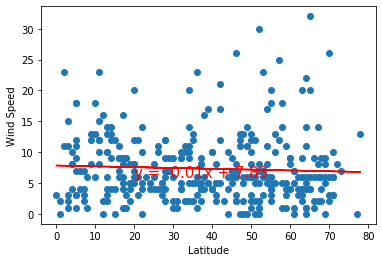

In [56]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Wind Speed (mph) vs Lat.png')
plt.show()

## Nothern Hemisphere wind speed vs latitude
no relationship established between the wind speed and the latitude in the nothern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23230885646607075


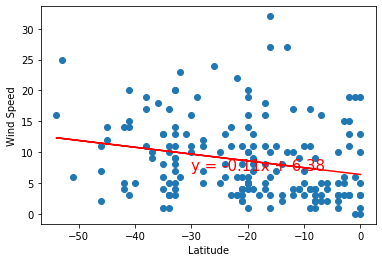

In [57]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Wind Speed (mph) vs Lat.png')
plt.show()

## Southern hemisphere wind speed vs lat
Absolutely no relationship established between the wind speed and the latitude in the southern hemisphere.

# Analysis

No relationship can be established between latitude and the wind speed analyzed in this project. The relationships are too weak to give a clear indication of a trend.

Looking at the humidity and latitude of the nothern hemisphere, we can see a relationship almost being formed but it is too weak.

The humidity in the southern hemisphere shows it becoming more humid as you go up the latitude.